Below is the code for the maximum-subarray problem

In [57]:
import math

def max_crossing_subarray(A, low, mid, high):
#     print("Finding cross sum : low, mid, high",low, mid, high)
    left_sum = -math.inf
    sum = 0

    for i in range(mid, low-1, -1):
        sum = sum + A[i]
        if sum > left_sum:
            left_sum = sum
            max_left = i
    right_sum = -math.inf
    sum = 0
    for j in range(mid + 1, high + 1):
        sum = sum + A[j]
        if sum > right_sum:
            right_sum = sum
            max_right = j
            
    return (max_left, max_right, left_sum + right_sum)

def maximum_subarray(A, low, high):
    
    if high == low:
        return (low, high, A[low])
    else: 
        mid = math.floor((low + high)/2)
        left_low, left_high, left_sum = maximum_subarray(A, low, mid)
        right_low, right_high, right_sum = maximum_subarray(A, mid + 1, high)
        cross_low, cross_high, cross_sum = max_crossing_subarray(A, low, mid, high)
        
        if left_sum >= right_sum and left_sum >= cross_sum:
            return (left_low, left_high, left_sum)
        elif right_sum >= left_sum and right_sum >= cross_sum:
            return (right_low, right_high, right_sum)
        else:
            return (cross_low, cross_high, cross_sum)
        


In [72]:
A = [13,-3,-25,20,-3,-16,-23,18,20,-7,12,-5,-22,15,-4,7]
low, high, sum_ = maximum_subarray(A, 0, len(A)-1)
print("low index :",low)
print("high index :",high)
print("Maximum sub Array sum :",sum_)

low index : 7
high index : 10
Maximum sub Array sum : 43


Plotting graph for actual time spent for maximum subarray algorithm

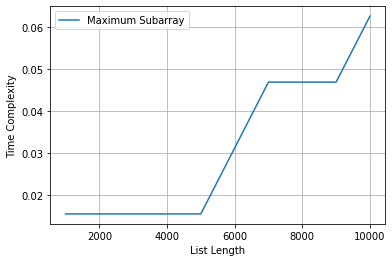

In [70]:
import time
import numpy as np
import matplotlib.pyplot as plt


lists = []
times = []

for i in range(1,11):
    np.random.seed(12)
    a = np.random.randint(0, 1000 * i, 1000 * i)
    start_time = time.process_time()
    maximum_subarray(a, 0, len(a)-1)
    end_time = time.process_time()
    
    lists.append(len(a))
    times.append(end_time-start_time)
    
plt.xlabel('List Length')
plt.ylabel('Time Complexity')
plt.plot(lists, times, label ='Maximum Subarray')
plt.grid()
plt.legend()
plt.show()

Plotting graph for theoritical complexity of maximum subarray algorithm

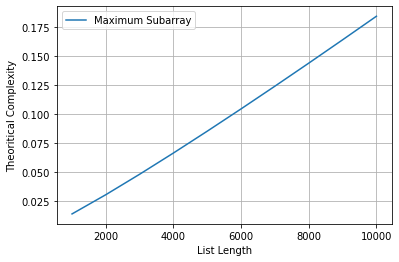

In [60]:
x_list = []
y_list = []
c = 1/500000

for i in range(1,11):
    n = 1000 * i
    x_list.append(n)
    y = c * n * np.log(n)
    y_list.append(y)
    
plt.xlabel('List Length')
plt.ylabel('Theoritical Complexity')
plt.plot(x_list, y_list, label ='Maximum Subarray')
plt.grid()
plt.legend()
plt.show()

From the graphs plotted for actual time spent (actual time complexity) and theoritical time complexity, they are not exactly the same but have similar increasing pattern. This indicates that the actual time complexity is indeed O(nlog(n))